# Imports

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score , recall_score
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (15,10)

# Data

In [2]:
df = pd.read_csv('./bank-full.csv',delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Check for null and duplicated data

In [3]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


*No null or duplicate fields*

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#  Data preprocessing

In [6]:
# Convert non numerical columns to numerical columns
cols = df.columns
non_num = [x for x in cols if df[x].dtype == 'O']
non_num

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

*I used LabelEncoder to convert the non numerical -> numerical and also created a dictionary which stores the transformation informaation sinces using for loop the LabelEncoder instance cant be preserved*

In [7]:
enc = {}
for i in non_num:
    temp = {}
    lbenc = LabelEncoder()
    df[i] = lbenc.fit_transform(df[i])
    for k,col in enumerate(lbenc.classes_):
        temp[k] = col
    enc[i] = temp

In [8]:
enc

{'job': {0: 'admin.',
  1: 'blue-collar',
  2: 'entrepreneur',
  3: 'housemaid',
  4: 'management',
  5: 'retired',
  6: 'self-employed',
  7: 'services',
  8: 'student',
  9: 'technician',
  10: 'unemployed',
  11: 'unknown'},
 'marital': {0: 'divorced', 1: 'married', 2: 'single'},
 'education': {0: 'primary', 1: 'secondary', 2: 'tertiary', 3: 'unknown'},
 'default': {0: 'no', 1: 'yes'},
 'housing': {0: 'no', 1: 'yes'},
 'loan': {0: 'no', 1: 'yes'},
 'contact': {0: 'cellular', 1: 'telephone', 2: 'unknown'},
 'month': {0: 'apr',
  1: 'aug',
  2: 'dec',
  3: 'feb',
  4: 'jan',
  5: 'jul',
  6: 'jun',
  7: 'mar',
  8: 'may',
  9: 'nov',
  10: 'oct',
  11: 'sep'},
 'poutcome': {0: 'failure', 1: 'other', 2: 'success', 3: 'unknown'},
 'y': {0: 'no', 1: 'yes'}}

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  y          45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


In [10]:
X = df.drop('y',axis=1)
Y = df['y']

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

# Model Building

*Logistic Regressor with parameters*<br>
* *penalty = l1 since it will also work as feature selection by srinking the feature with non significant slope*
* *solver = Algos to use for optimization i am using liblinear since liblinear and saga are the only solver that support l1 penalty*
* *C = Strength of regularization*

In [12]:
lgr = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lgr.fit(xtrain,ytrain)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [13]:
lgr.score(xtest,ytest)

0.8877584872276899

In [14]:
ypred = lgr.predict(xtest)

## Evaluation

In [15]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.60      0.21      0.31      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043



Text(160.22222222222223, 0.5, 'Predicted Values')

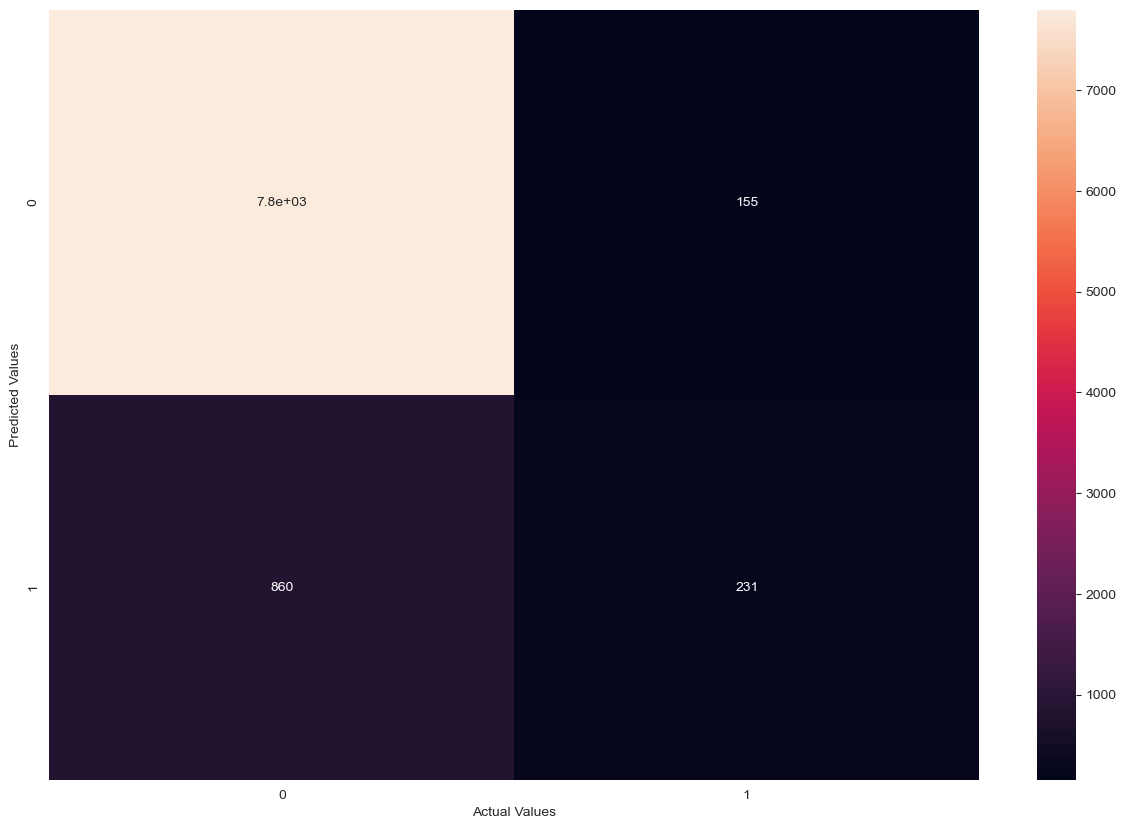

In [16]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='0.3g')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

**Observation**: *Too many False positives*

# Threshold Selection

In [17]:
proba = lgr.predict_proba(xtest)[:,1]
proba

array([0.0165207 , 0.03505093, 0.06513588, ..., 0.0148009 , 0.00592485,
       0.03575696])

In [18]:
fpr,tpr,threshold = roc_curve(ytest,proba)
auc = roc_auc_score(ytest,proba)

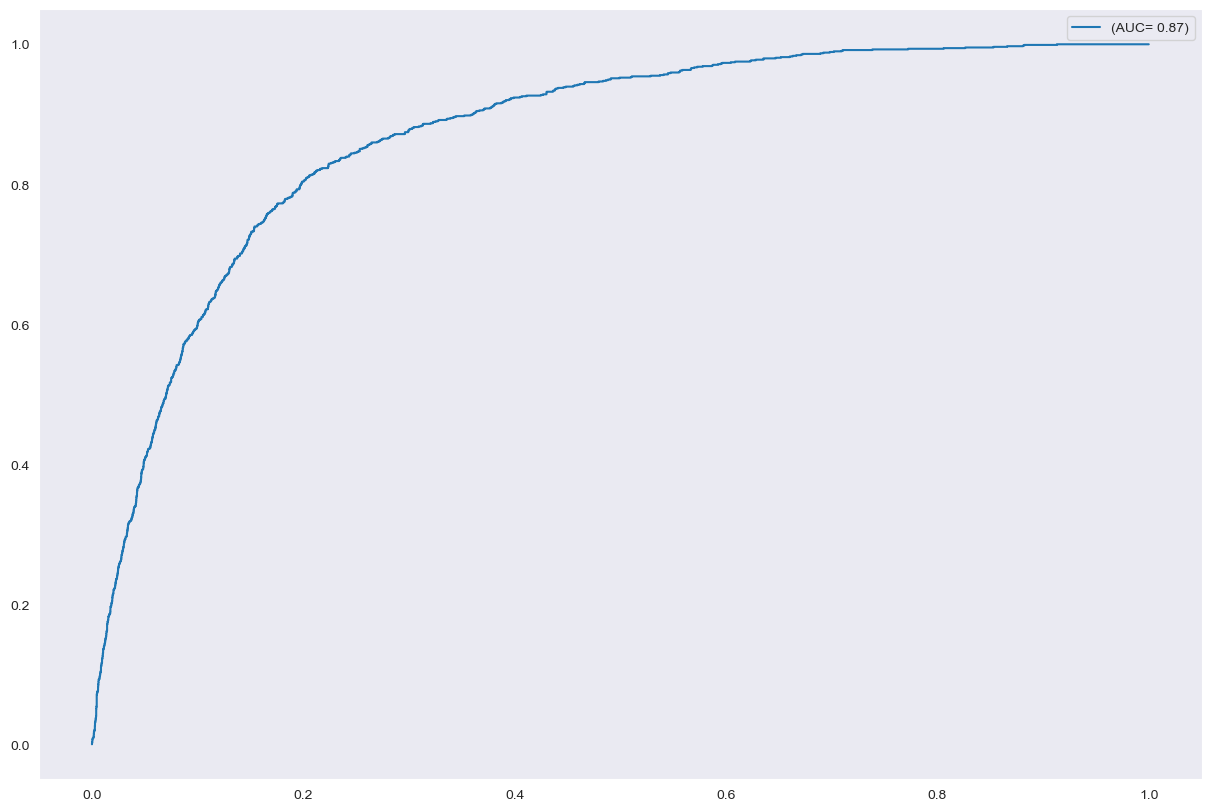

In [19]:
plt.plot(fpr,tpr, label = '(AUC= %0.2f)'%auc)
plt.grid()
plt.legend()

# Select best threshold value using accuracy metrics

In [20]:
accuracy = []

for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))

In [21]:
thresh_sel = pd.DataFrame({
    'Threshold' : threshold,
    'Accuracy' :  accuracy
})

In [22]:
thresh_sel

,Threshold,Accuracy
0,1.999618,0.879354
1,0.999618,0.879354
2,0.998255,0.879465
3,0.992212,0.879465
4,0.990256,0.879465
...,...,...
1436,0.011851,0.224041
1437,0.011814,0.223930
1438,0.009834,0.197058
1439,0.009834,0.196948


In [23]:
thresh_sel.sort_values(by="Accuracy", ascending=False)

,Threshold,Accuracy
186,0.492233,0.887980
187,0.491918,0.887869
185,0.492543,0.887869
179,0.499759,0.887758
229,0.451488,0.887758
...,...,...
1436,0.011851,0.224041
1437,0.011814,0.223930
1438,0.009834,0.197058
1439,0.009834,0.196948


In [24]:
ypred = binarize([proba], threshold=0.458382)[0]

In [25]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.58      0.25      0.35      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.61      0.64      9043
weighted avg       0.86      0.89      0.87      9043



<Axes: >

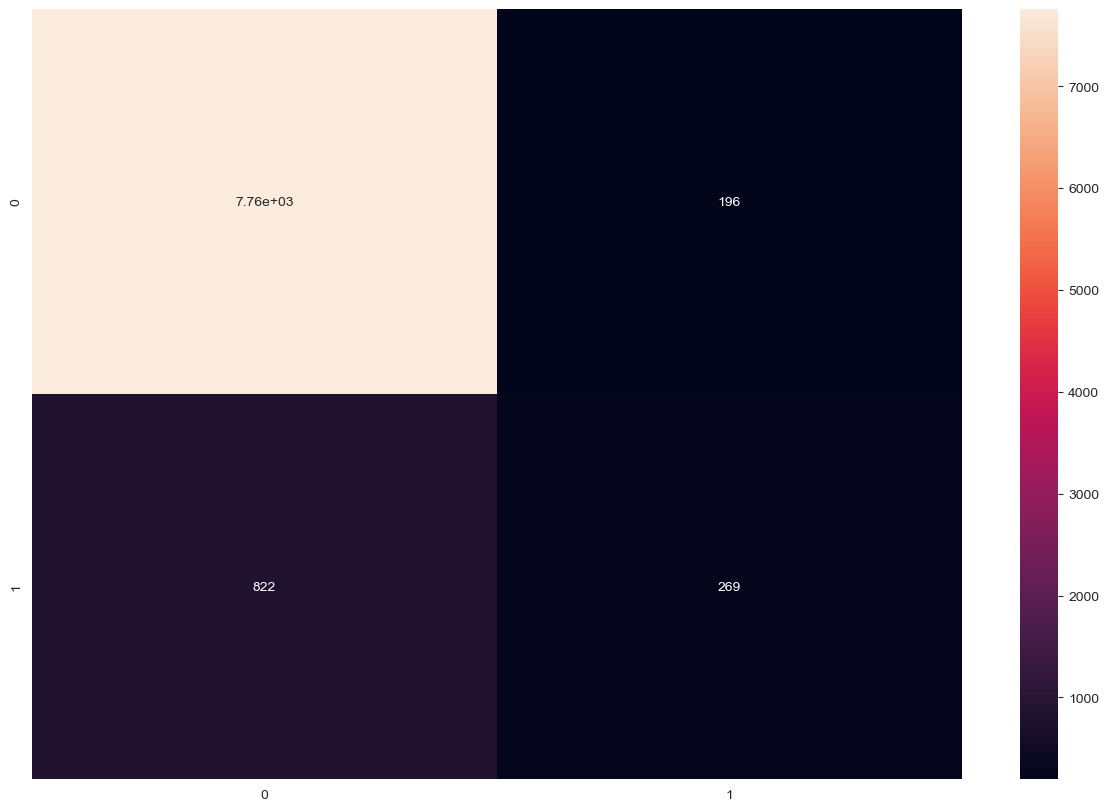

In [26]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='0.3g')

*Managed to improve score from 0.87 to 0.89*